# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [23]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Your Code Here

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [24]:
titanic = pd.read_csv("../data/titanic.csv")
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
382,383,0.0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,U0,S
835,836,1.0,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C
104,105,0.0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,U0,S
1123,1124,NaN,3,"Wiklund, Mr. Karl Johan",male,21.0,1,0,3101266,6.4958,U0,S
558,559,1.0,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.6500,E67,S


#### Explore the titanic dataset using Pandas dtypes.

In [25]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [26]:
# Numerical: ID, Survived, Pclass, Age, Parch
# Categorical: Gender, Cabin, Embarked

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [27]:
# plt.style.use('classic')
# sns.set(rc = {'figure.figsize':(15, 6)})

#### Use the right visulalization to show the distribution of column `Age`.

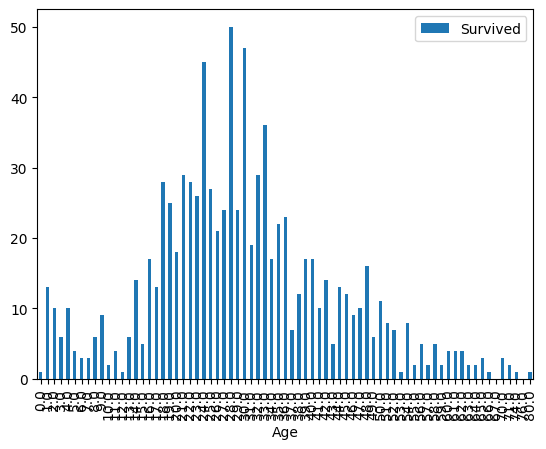

In [28]:
titanic1 = titanic[["Age", "Survived"]].round()
titanic1 = titanic1.groupby(["Age"]).count()
titanic1.plot.bar();

#### How does the bin size affect your plot?

In [29]:
"""
your comments here
"""

'\nyour comments here\n'

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

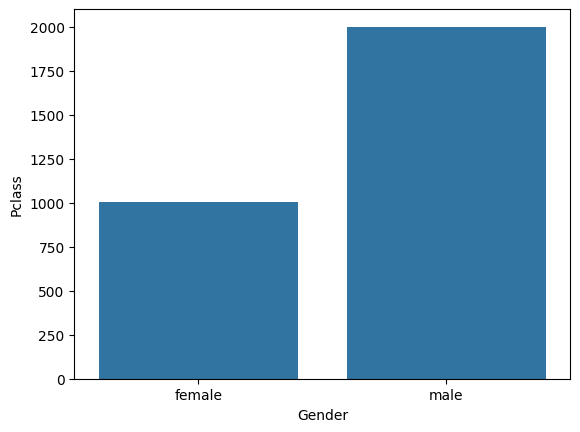

In [30]:
df = titanic[["Gender", "Pclass"]]
df1 = df.groupby(["Gender"]).sum()
sns.barplot(df1, x="Gender", y="Pclass");

#### Use the right plot to visualize the column `Pclass`.

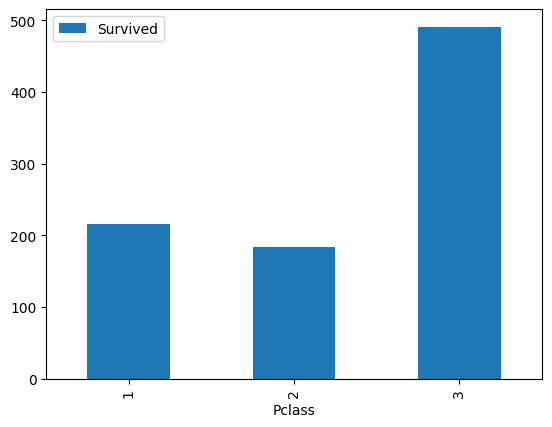

In [31]:
titanic1 = titanic[["Pclass", "Survived"]].round()
titanic1 = titanic1.groupby(["Pclass"]).count()
titanic1.plot.bar();

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it and list all the info it's giving you.

[Hint](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

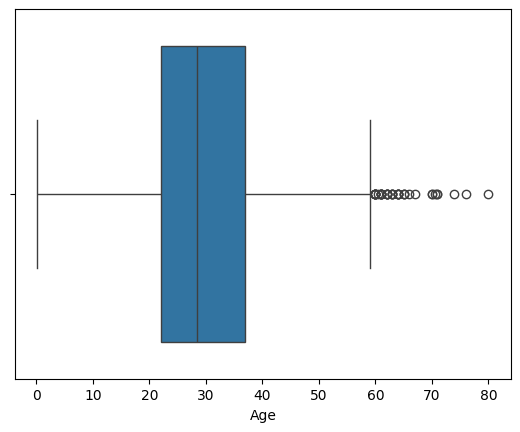

In [32]:
sns.boxplot(x=titanic["Age"]);

In [33]:
"""
your comments here
"""

'\nyour comments here\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

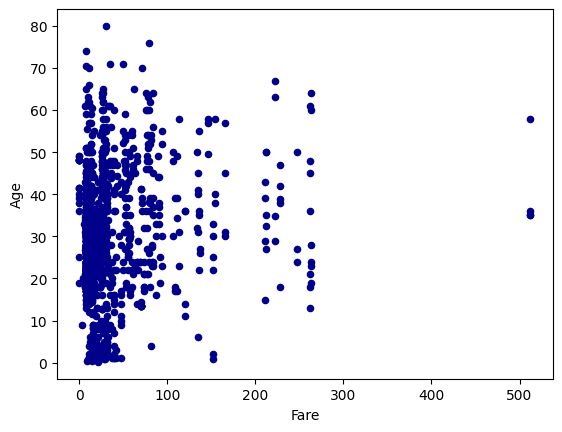

In [34]:
titanic.plot.scatter(x='Fare', y='Age', c='DarkBlue');

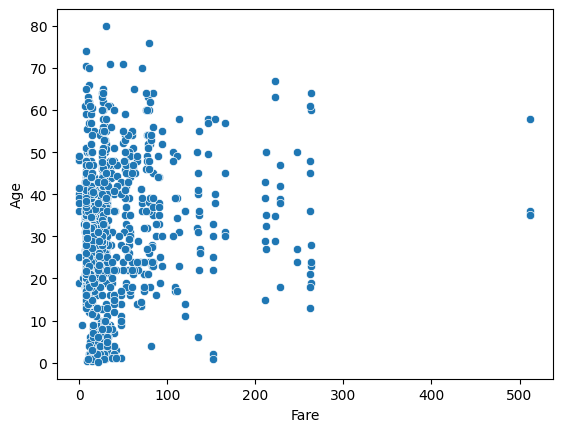

In [35]:
sns.scatterplot(data=titanic, x="Fare", y="Age");

#### Plot the correlation matrix using seaborn.

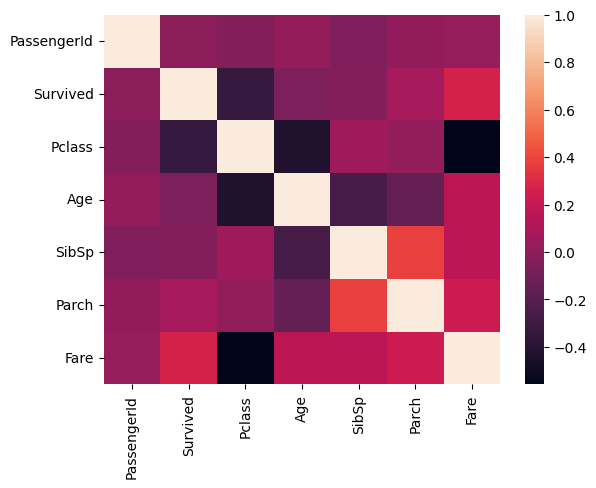

In [36]:
titanic2 = titanic.drop(["Name", "Gender", "Ticket", "Cabin", "Embarked"], axis=1)
sns.heatmap(titanic2.corr());

#### What are the most correlated features?

In [37]:
"""
Fare & Survived
SibSp & Parch
"""

'\nFare & Survived\nSibSp & Parch\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [38]:
a = titanic[["Age", "Pclass"]].describe()
a

,Age,Pclass
count,1309.000000,1309.000000
mean,29.879186,2.294882
std,13.448335,0.837836
min,0.170000,1.000000
25%,22.000000,2.000000
50%,28.500000,3.000000
75%,37.000000,3.000000
max,80.000000,3.000000


#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

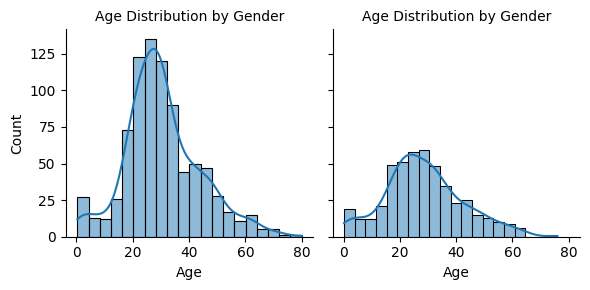

In [39]:
g = sns.FacetGrid(titanic, col="Gender")
g.map(sns.histplot, "Age", kde=True, bins=20)
g.set_axis_labels("Age", "Count")
g.set_titles("Age Distribution by Gender")
plt.show()